# Linear Regression Theory and Examples

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 8]

%config Completer.use_jedi = False
# https://stackoverflow.com/questions/44186370/kernel-taking-too-long-to-autocomplete-tab-in-jupyter-notebook
# https://stackoverflow.com/questions/40536560/ipython-and-jupyter-autocomplete-not-working

# import warnings
# warnings.filterwarnings("ignore")

print("Imports Done!")

Imports Done!


## Simple Regression

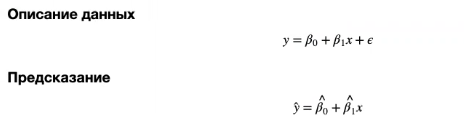

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)
df = pd.DataFrame(np.hstack([x, y]), columns=['x', 'y'])

In [3]:
df.head()

,x,y
0,1.613049,9.135025
1,1.352232,8.085736
2,0.729723,6.449555
3,1.872633,10.090364
4,0.597197,6.032922


Text(0, 0.5, 'y (target)')

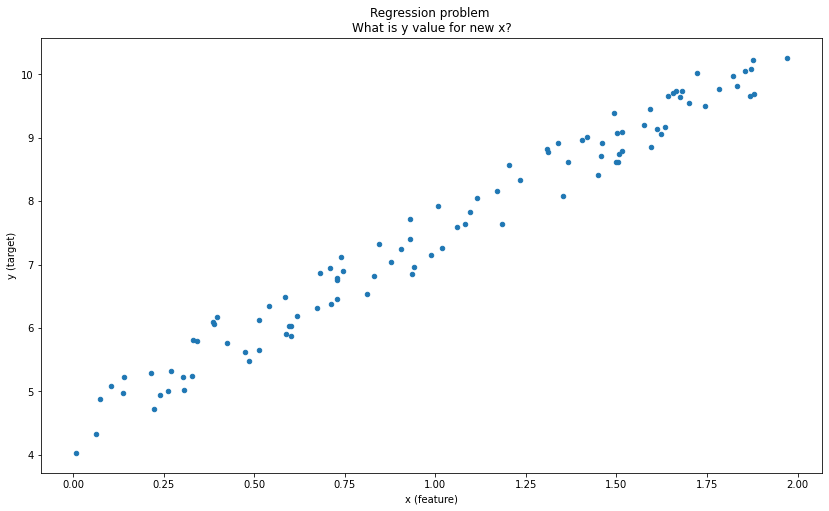

In [4]:
df.plot.scatter('x', 'y')
plt.title("Regression problem \nWhat is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

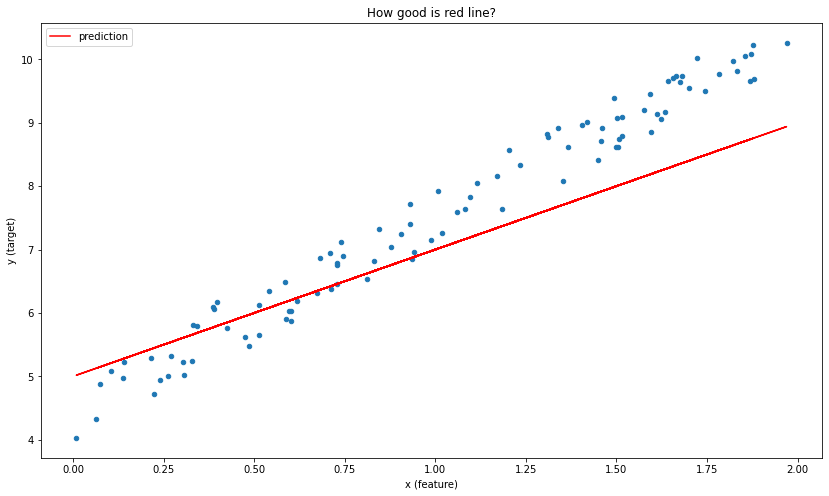

In [5]:
def predict(x):
    "Prediction"
    return 2 * x + 5

df.plot.scatter('x', 'y')
plt.title("How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

plt.plot(x, predict(x), color="red", label='prediction')
plt.legend()

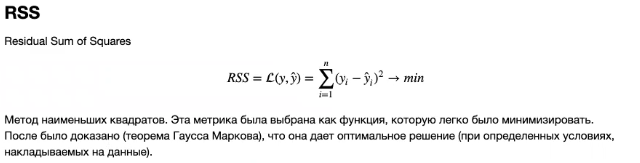

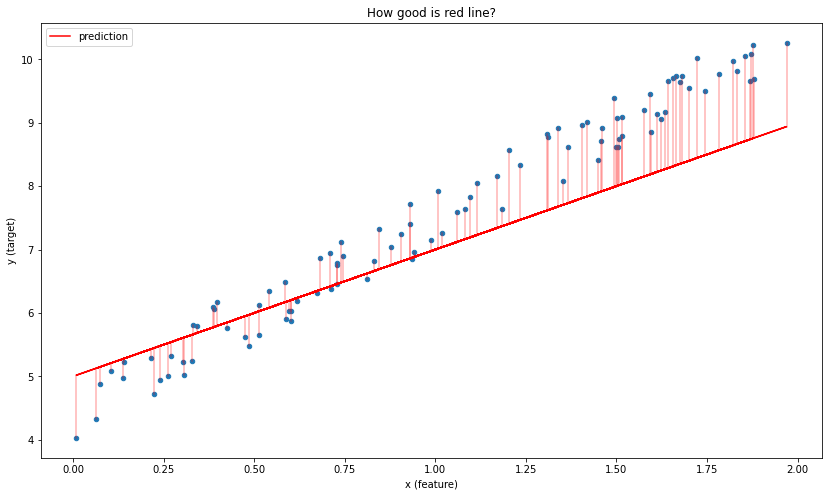

In [6]:
y_pred = predict(x)

df.plot.scatter('x', 'y')
plt.title("How good is red line?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

plt.plot(x, y_pred, color="red", label='prediction')
plt.legend()

for x_i, y_i, y_i_pred in zip(x, y, y_pred):
    plt.plot([x_i, x_i], [y_i_pred, y_i], color="red", alpha=0.3)

In [7]:
rss = ((y - y_pred) ** 2).sum()
print(rss)

62.5718644797105


In [8]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y, y_pred) * y.size)

62.571864479710506


In [9]:
mean_squared_error(y, y_pred) * y.size == ((y - y_pred) ** 2).sum()

False

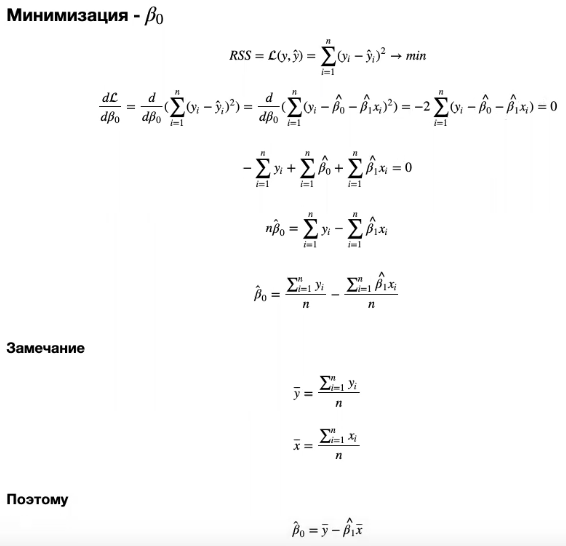

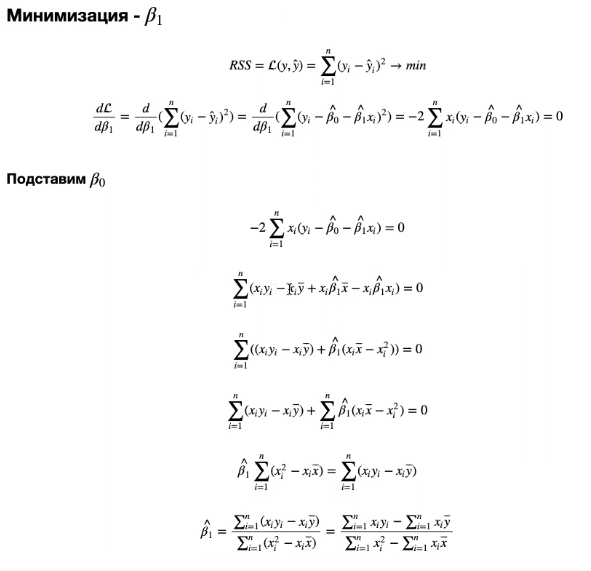

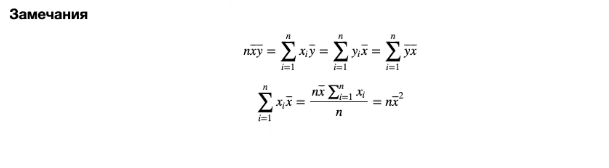

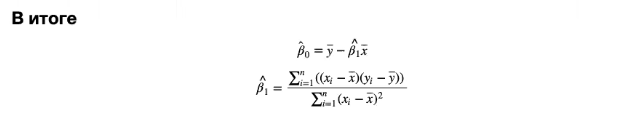

In [10]:
def estimate(x, y):
    y_average = y.mean()
    x_average = x.mean()
    
    beta_1 = ((x - x_average) * (y - y_average)).sum() / ((x - x_average) ** 2).sum()
    beta_0 = y_average - beta_1 * x_average
    
    return beta_0, beta_1

def predict_estimated(x, beta_0, beta_1):
    return beta_0 + x * beta_1

In [11]:
beta_0, beta_1 = estimate(x, y)
beta_0, beta_1

(4.469869872979667, 2.9985939523795784)

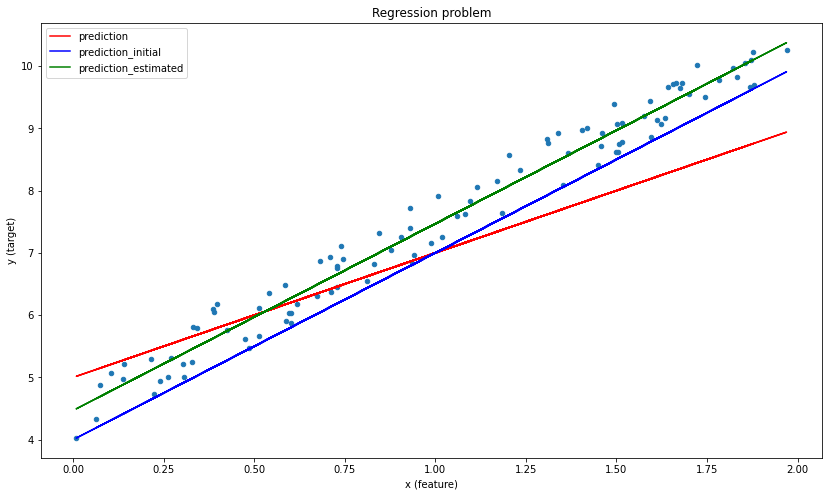

In [12]:
df.plot.scatter('x', 'y')
plt.title("Regression problem")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")

plt.plot(x, predict(x), color="red", label='prediction')
plt.plot(x, predict_estimated(x, 4, 3), color="blue", label='prediction_initial')
plt.plot(x, predict_estimated(x, beta_0, beta_1), color="green", label='prediction_estimated')
plt.legend()

In [13]:
print("Estimated_values: beta_0 = {}, beta_1 = {}".format(beta_0, beta_1))
print("Initial_values: beta_0 = 4, beta_1 = 3")

Estimated_values: beta_0 = 4.469869872979667, beta_1 = 2.9985939523795784
Initial_values: beta_0 = 4, beta_1 = 3


## Multiple regression

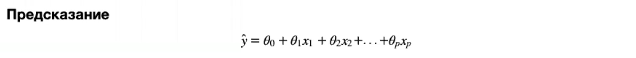

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

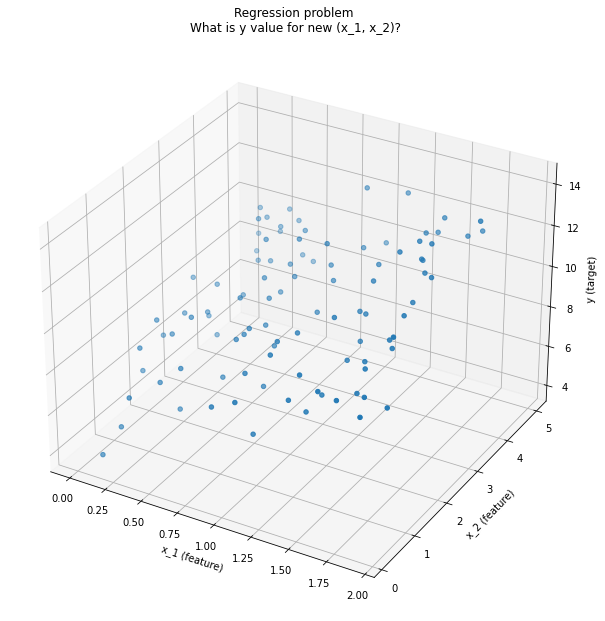

In [15]:
plt.rcParams["figure.figsize"] = [12, 8]
fig = plt.figure()
ax = Axes3D(fig)

x_1 = 2 * np.random.rand(100, 1)
x_2 = 5 * np.random.rand(100, 1)

# y = 4 + 3*x_1 + 1*x_2
y = 4 + 3*x_1 + x_2 + np.random.randn(100, 1)

ax.scatter(x_1, x_2, y, marker='o')
ax.set_title('Regression problem \nWhat is y value for new (x_1, x_2)?')
ax.set_xlabel("x_1 (feature)")
ax.set_ylabel("x_2 (feature)")
ax.set_zlabel("y (target)")
plt.show()

### Матричная форма

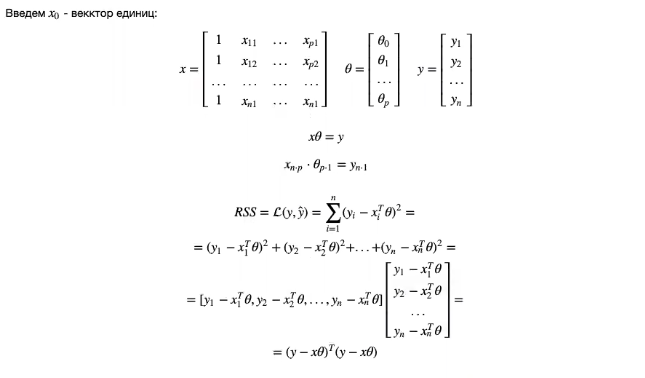

### Производная по матрице

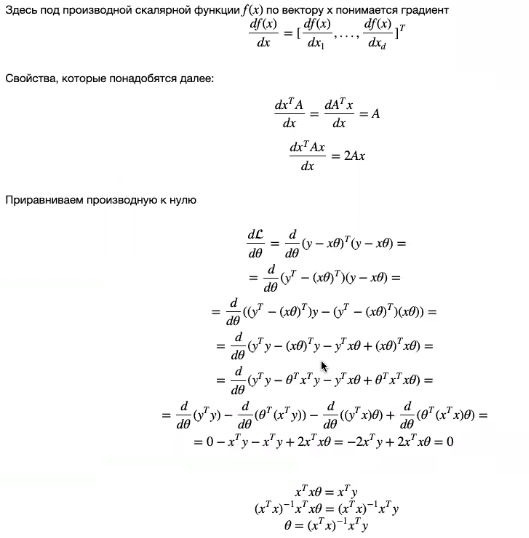

In [16]:
import numpy.linalg as la

In [17]:
x = np.hstack([np.ones(x.shape[0]).reshape(-1, 1), x_1, x_2])

w = la.inv(x.T.dot(x)).dot(x.T).dot(y) 
# формула аналитического решения МНК для нахождения коэффициентов линейной регрессии в матричном виде. 
# По-умолчанию используется в sklearn.
print(w)

[[4.66791987]
 [2.78909542]
 [0.85182344]]


In [18]:
def predict_estimated(x, w):
    return x.dot(w)

def plane(x_1, x_2):
    return 4 + x_1 * 3 + x_2

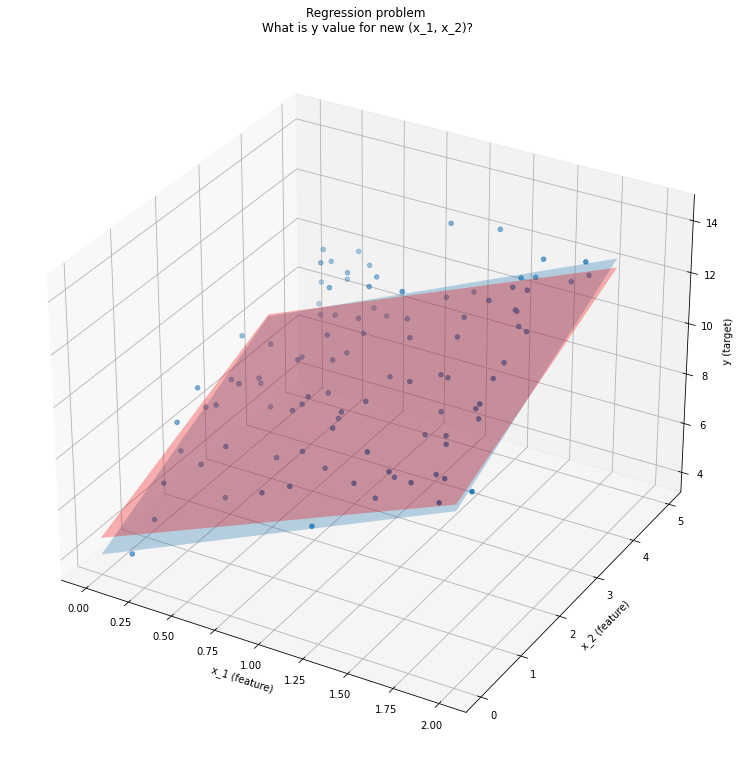

In [19]:
fig = plt.figure(figsize=(20, 10))
ax = Axes3D(fig)

x_1_surface = np.arange(0, 2.5, 0.5)
x_2_surface = np.arange(0, 5.0, 1)
x_1_surf, x_2_surf = np.meshgrid(x_1_surface, x_2_surface)

z_surface = np.array([plane(x_i, y_i) for x_i, y_i in zip(np.ravel(x_1_surf), np.ravel(x_2_surf))])
z = z_surface.reshape(x_1_surf.shape)
ax.plot_surface(x_1_surf, x_2_surf, z, alpha=0.3)

z_surface_pred = np.array([predict_estimated(np.array([[1, x_i, y_i]]), w) for x_i, y_i in zip(np.ravel(x_1_surf), np.ravel(x_2_surf))])
z_predicted = z_surface_pred.reshape(x_1_surf.shape)
ax.plot_surface(x_1_surf, x_2_surf, z_predicted, alpha=0.3, color='red')
ax.scatter(x_1, x_2, y, marker='o')

ax.set_title('Regression problem \nWhat is y value for new (x_1, x_2)?')
ax.set_xlabel("x_1 (feature)")
ax.set_ylabel("x_2 (feature)")
ax.set_zlabel("y (target)")
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(np.hstack([x_1, x_2]), y)

print("Intercept: {:.4f} \nSlopes: {}\n".format(lin_reg.intercept_[0], lin_reg.coef_[0]))

y_pred = lin_reg.predict(np.hstack([x_1, x_2]))
print("Prediction:\n", np.hstack([y_pred, y])[:10])
print("\nMSE: {:.4f}".format(mean_squared_error(y_pred, y)))

Intercept: 4.6679 
Slopes: [2.78909542 0.85182344]

Prediction:
 [[ 9.15518659  8.2707538 ]
 [ 8.56397523  7.12824512]
 [ 7.26105499  8.59568926]
 [11.94866777 12.03377303]
 [ 8.11745741  8.5072446 ]
 [13.35154223 12.4175784 ]
 [ 9.56949307  8.40048518]
 [ 9.00112794  8.20169225]
 [ 9.85917164  9.08416451]
 [10.68978475 10.34254292]]

MSE: 0.8415


In [21]:
print(w[0, 0])

4.667919874667547


In [22]:
print("Is equal? ", round(lin_reg.intercept_[0], 4) == round(w[0, 0], 4))

Is equal?  True


In [23]:
print(w[1:3, 0])

[2.78909542 0.85182344]


In [24]:
for element_1, element_2 in zip(lin_reg.coef_[0], w[1:3, 0]):
    print("Slope for")
    print("sklearn linear model: {} | linear algebra equation: {}".format(element_1, element_2))
    print("Is equal? ", round(element_1, 4) == round(element_2, 4))
# round(lin_reg.coef_[0], 4) == round(w[1:3, 0], 4) # Ошибка, т. к. для np.array нет метода round 

Slope for
sklearn linear model: 2.789095422387404 | linear algebra equation: 2.7890954223874083
Is equal?  True
Slope for
sklearn linear model: 0.8518234407115995 | linear algebra equation: 0.8518234407115981
Is equal?  True


## Вычислительная сложность

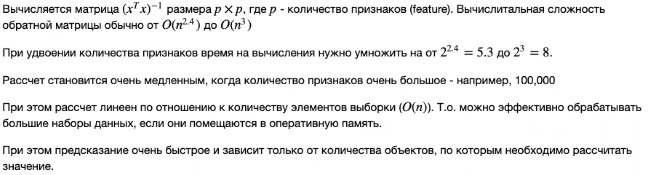

В настоящее время аналитическим способом ЛР практически никогда не оценивается из-за вычислительной сложности!

Сложная и объёмная по вычислениям операция - взятие обратной матрицы.

Сейчас используется преимущественно градиентный спуск, т. к. он эффективнее в вычислительном плане. Также используются приближённые вычисления.

## Полиномиальная регрессия

Иногда можно обобщить ЛР на нелинейный случай.

In [25]:
m = 100 
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 +np.random.randn(m, 1)

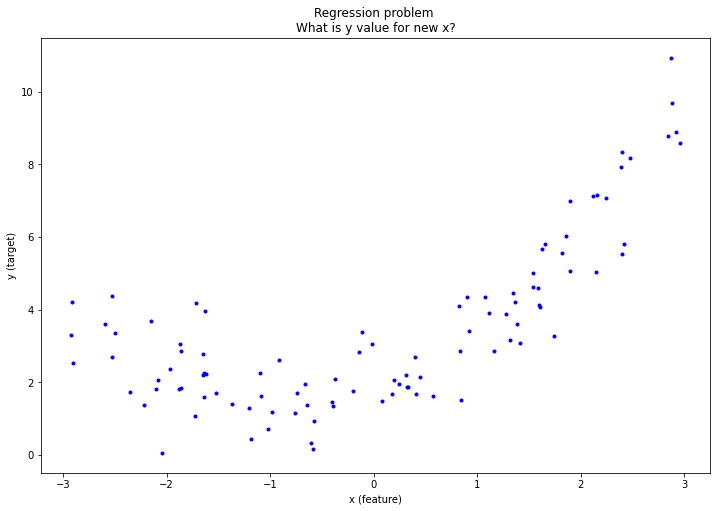

In [26]:
plt.plot(X, y, "b.")
plt.title("Regression problem \nWhat is y value for new x?")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.show()

Добавляем $x^{2}$ как ещё один признак:

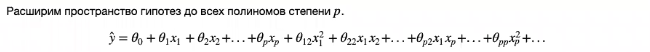

In [27]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [28]:
X[0]

array([0.41261482])

In [29]:
X_poly[0]

array([0.41261482, 0.17025099])

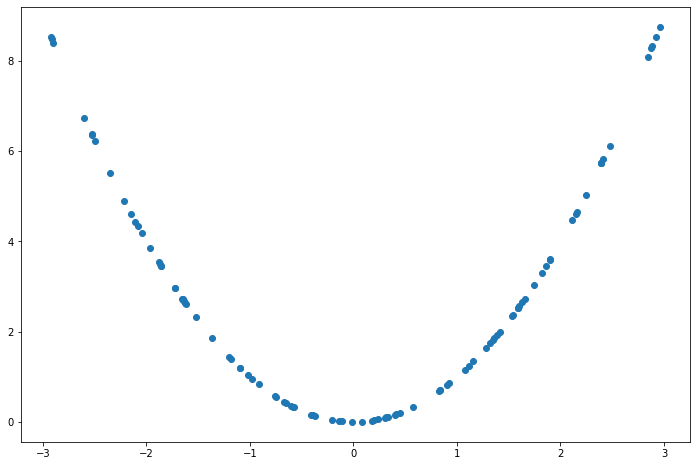

In [30]:
plt.scatter(X_poly[:, 0], X_poly[:, 1])

$\hat{y} = {\theta}_{0} + {\theta}_{1}x_{1} +{\theta}_{2}x^{2}_{1}$

In [31]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([1.87165365]), array([[0.91921564, 0.55184895]]))

In [32]:
# np.linspace(-3, 3, 100)
# np.linspace(-3, 3, 100).shape
# np.linspace(-3, 3, 100).reshape(100, 1)
# np.linspace(-3, 3, 100).reshape(100, 1).shape

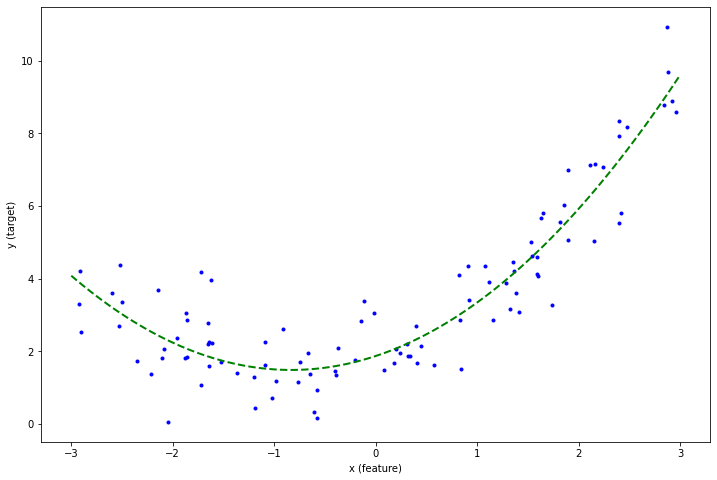

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "g--", linewidth=2, label="Predictions")
plt.xlabel("x (feature)")
plt.ylabel("y (target)")
plt.show()

## Проблема переобучения

-------------------
Model_degree: 300. |	MSE: 1.6725452601815407e+28 |	MAE: 18210810447919.625.
-------------------
Model_degree: 2. |	MSE: 10.383433854090024 |	MAE: 2.4634478879324377.
-------------------
Model_degree: 1. |	MSE: 7.61433316053893 |	MAE: 2.1883815338354693.


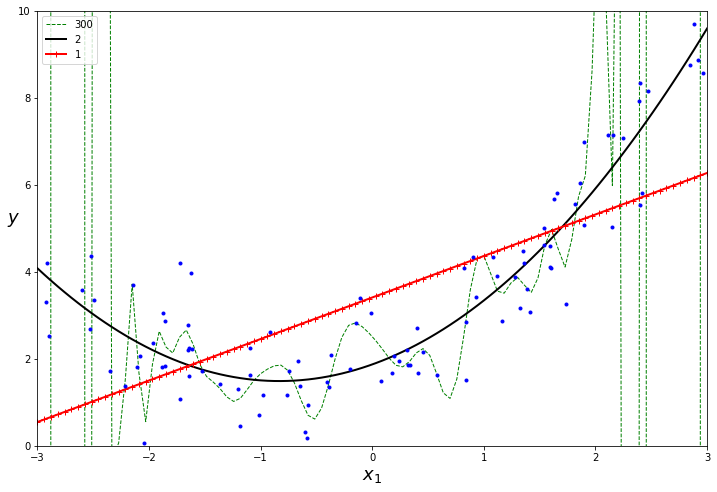

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

for style, width, degree in (("g--", 1, 300), ('k-', 2, 2), ("r-+", 2, 1)):
    
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False) # построение полиномиальных признаков
    
    std_scaler = StandardScaler() # стандартизация-приведение данных к одному масштабу, чтобы модель лучше работала
    
    lr_model = LinearRegression() # вызов модели
    
    # Пайплайн объединяет несколько разных этапов препроцессинга и моделирования в один объект
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lr_model", lr_model)
    ]) 
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    print("-------------------\nModel_degree: {}. |\tMSE: {} |\tMAE: {}.".format(degree, 
                                                                                mean_squared_error(y, y_newbig),
                                                                                mean_absolute_error(y, y_newbig)))
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

## Регуляризация

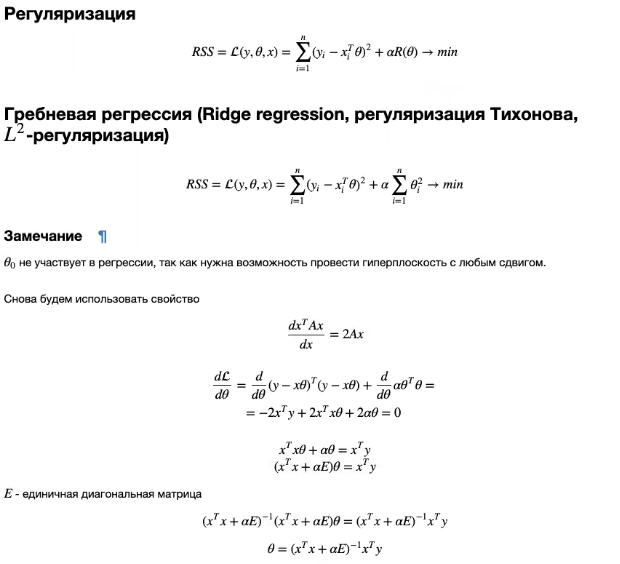

Model_degree: 100. |	MSE: 19.332379330168756 |	MAE: 2.708794439900849.


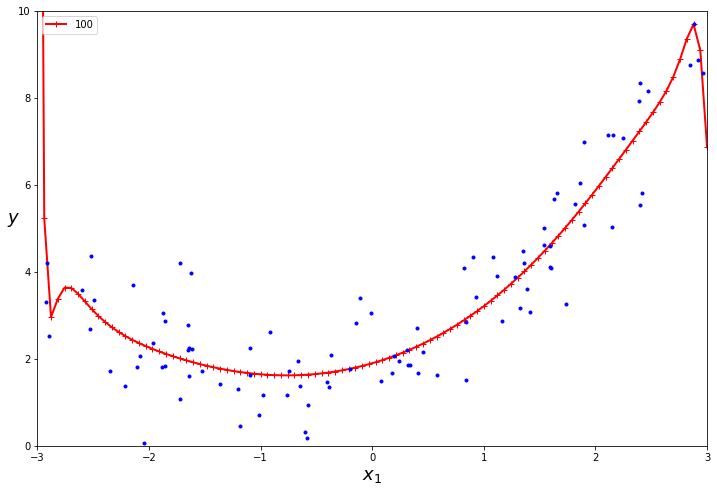

In [55]:
from sklearn.linear_model import Ridge

polybig_features = PolynomialFeatures(degree=100, include_bias=False)

std_scaler = StandardScaler() 

ridge_regression = Ridge(alpha=1)

polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("ridge_model", ridge_regression)
]) 

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)
print("Model_degree: {}. |\tMSE: {} |\tMAE: {}.".format(100, mean_squared_error(y, y_newbig),
                                                        mean_absolute_error(y, y_newbig)))
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [51]:
ridge_regression.coef_[0]

array([ 1.24528937e+00,  1.29517962e+00,  3.45312582e-01,  1.87165938e-01,
        1.38592973e-01, -1.32278213e-01, -4.83493815e-02, -9.34334978e-02,
       -1.59645744e-01,  9.47634378e-04, -1.83707156e-01,  6.49793190e-02,
       -1.52982912e-01,  9.11540453e-02, -9.89961067e-02,  9.11363245e-02,
       -4.14445094e-02,  7.69875870e-02,  9.85445500e-03,  5.70761075e-02,
        5.11375964e-02,  3.63068576e-02,  8.18261919e-02,  1.71880062e-02,
        1.02804792e-01,  7.69248729e-04,  1.15497505e-01, -1.27114551e-02,
        1.21413493e-01, -2.34257592e-02,  1.21946320e-01, -3.17203889e-02,
        1.18302499e-01, -3.79880190e-02,  1.11491597e-01, -4.26013202e-02,
        1.02342820e-01, -4.58834619e-02,  9.15306154e-02, -4.80988147e-02,
        7.96011619e-02, -4.94542206e-02,  6.69962789e-02, -5.01052585e-02,
        5.40736509e-02, -5.01643763e-02,  4.11233196e-02, -4.97092098e-02,
        2.83808481e-02, -4.87902518e-02,  1.60376986e-02, -4.74375182e-02,
        4.24936195e-03, -

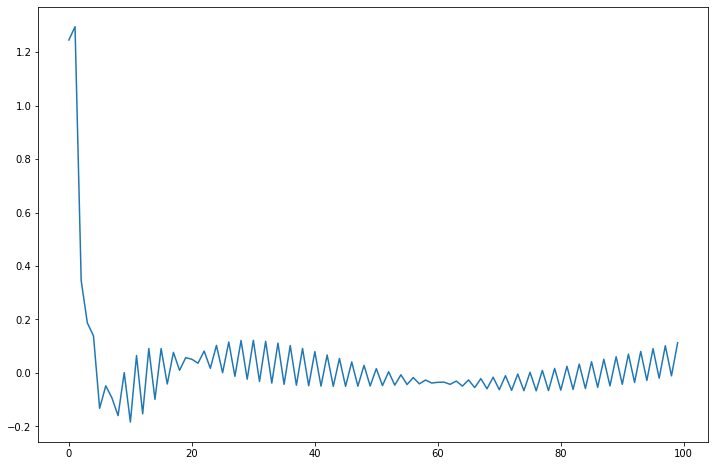

In [45]:
plt.plot(ridge_regression.coef_[0])

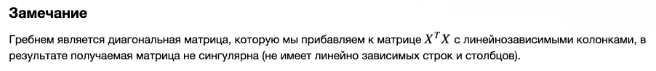

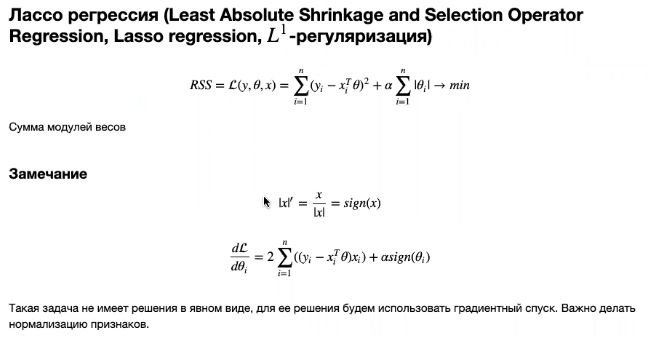

Model_degree: 100. |	MSE: 9.139668539676155 |	MAE: 2.315645123543589.


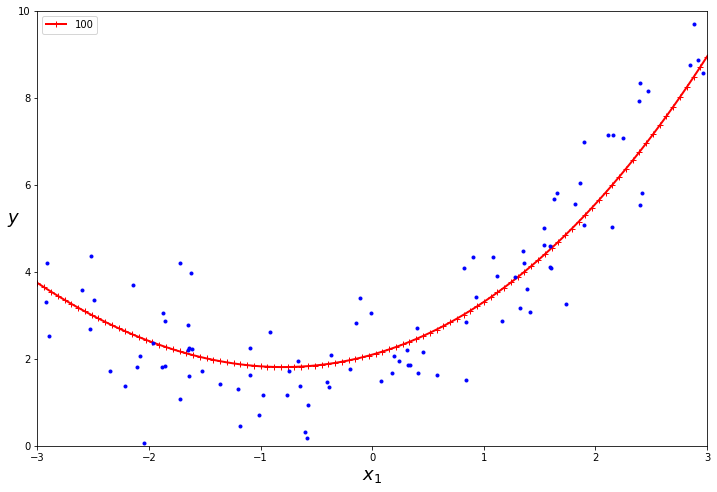

In [56]:
from sklearn.linear_model import Lasso

polybig_features = PolynomialFeatures(degree=100, include_bias=False)

std_scaler = StandardScaler() 

lasso_regression = Lasso(alpha=0.2)

polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("lasso_model", lasso_regression)
]) 

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)
print("Model_degree: {}. |\tMSE: {} |\tMAE: {}.".format(100, mean_squared_error(y, y_newbig),
                                                        mean_absolute_error(y, y_newbig)))
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [57]:
lasso_regression.coef_

array([1.21123199, 1.17537255, 0.14776559, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [58]:
lasso_regression.intercept_

array([3.44697659])

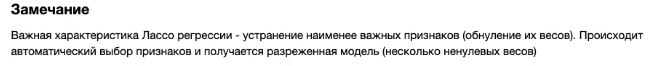

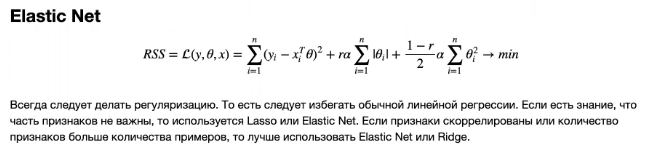

Model_degree: 100. |	MSE: 9.244484930776029 |	MAE: 2.3117217140697037.


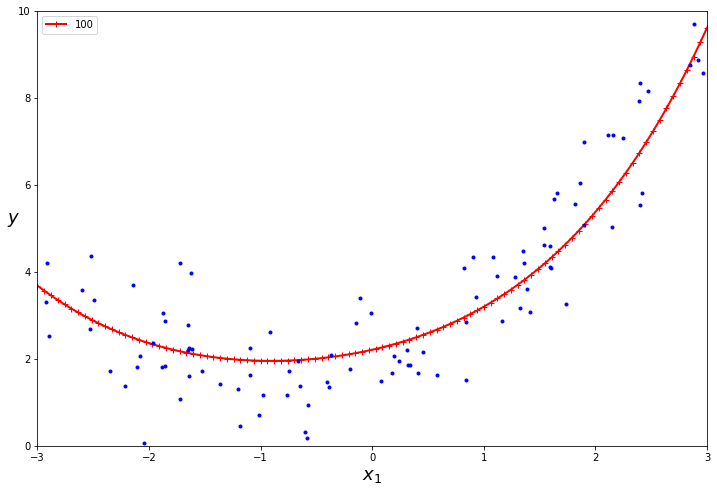

In [59]:
from sklearn.linear_model import ElasticNet

polybig_features = PolynomialFeatures(degree=100, include_bias=False)

std_scaler = StandardScaler() 

elastic_net_regression = ElasticNet(alpha=0.2)

polynomial_regression = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("elastic_net_model", elastic_net_regression)
]) 

polynomial_regression.fit(X, y)
y_newbig = polynomial_regression.predict(X_new)
plt.plot(X_new, y_newbig, style, label=str(100), linewidth=width)
print("Model_degree: {}. |\tMSE: {} |\tMAE: {}.".format(100, mean_squared_error(y, y_newbig),
                                                        mean_absolute_error(y, y_newbig)))
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [60]:
elastic_net_regression.intercept_

array([3.44697659])

In [61]:
elastic_net_regression.coef_

array([ 0.96731958,  0.87649163,  0.39601233,  0.31638493,  0.02228538,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

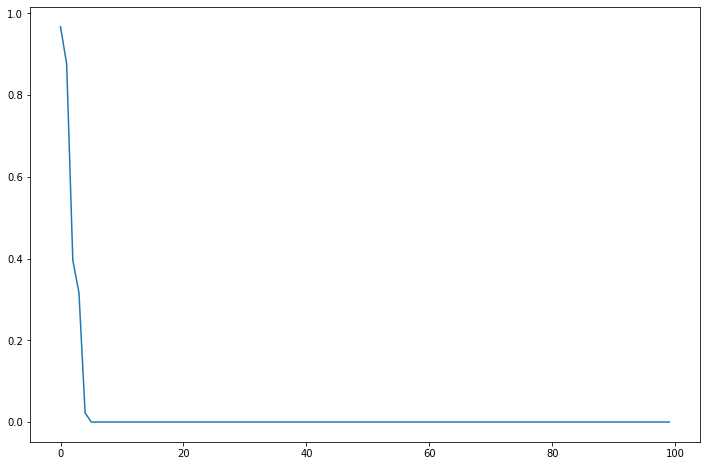

In [64]:
plt.plot(elastic_net_regression.coef_)

# Вывод: Регуляризацию имеет смысл применять всегда! 

Линейная регрессия в чистом виде - модель максимально склонная к переобучению. 

Если признаки сильно скоррелированы - следует использовать Ridge регрессию.